In [67]:

## *************** IMPORTING IMPORTANT LIBRARIES *****************************#

import nltk , pprint,re
import numpy as np
import pandas as pd 
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize




In [68]:
# READING PEN BANK TREE BASED SENTENCES 

wsj = list(nltk.corpus.treebank.tagged_sents())

In [69]:
print(wsj[:40])

[[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')], [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')], [('Rudolph', 'NNP'), ('Agnew', 'NNP'), (',', ','), ('55', 'CD'), ('years', 'NNS'), ('old', 'JJ'), ('and', 'CC'), ('former', 'JJ'), ('chairman', 'NN'), ('of', 'IN'), ('Consolidated', 'NNP'), ('Gold', 'NNP'), ('Fields', 'NNP'), ('PLC', 'NNP'), (',', ','), ('was', 'VBD'), ('named', 'VBN'), ('*-1', '-NONE-'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('of', 'IN'), ('this', 'DT'), ('British', 'JJ'), ('industrial', 'JJ'), ('conglomerate', 'NN'), ('.', '.')], [('A', 'DT'), ('f

In [70]:
# Splitting into train and test
random.seed(1234)

In [71]:
train_set,test_set = train_test_split(wsj,test_size = 0.3)

In [72]:
print(len(train_set))
print(len(test_set))
print(train_set[:40])

2739
1175
[[('If', 'IN'), ('he', 'PRP'), ('does', 'VBZ'), ('not', 'RB'), (',', ','), ('he', 'PRP'), ('will', 'MD'), ('help', 'VB'), ('*-1', '-NONE-'), ('realize', 'VB'), ('Madison', 'NNP'), ("'s", 'POS'), ('fear', 'NN'), ('in', 'IN'), ('The', 'DT'), ('Federalist', 'NNP'), ('No.', 'NN'), ('48', 'CD'), ('of', 'IN'), ('a', 'DT'), ('legislature', 'NN'), ('``', '``'), ('everywhere', 'RB'), ('extending', 'VBG'), ('the', 'DT'), ('sphere', 'NN'), ('of', 'IN'), ('its', 'PRP$'), ('activity', 'NN'), ('and', 'CC'), ('drawing', 'VBG'), ('all', 'DT'), ('powers', 'NNS'), ('into', 'IN'), ('its', 'PRP$'), ('impetuous', 'JJ'), ('vortex', 'NN'), ('.', '.'), ("''", "''")], [('``', '``'), ('Maybe', 'RB'), ('he', 'PRP'), ('just', 'RB'), ('wants', 'VBZ'), ('*-2', '-NONE-'), ('to', 'TO'), ('make', 'VB'), ('something', 'NN'), ('happen', 'VB'), (',', ','), ("''", "''"), ('said', 'VBD'), ('*T*-1', '-NONE-'), ('one', 'CD'), ('takeover', 'NN'), ('expert', 'NN'), ('.', '.')], [('``', '``'), ('I', 'PRP'), ('would', 

In [73]:
# Getting list of tuples

train_tagged_words = [tup for sent in train_set for tup in sent ]
len(train_tagged_words)

70626

In [74]:
## Tokens 

tokens = [pair[0] for pair in train_tagged_words ]
tokens[:10]

['If', 'he', 'does', 'not', ',', 'he', 'will', 'help', '*-1', 'realize']

In [75]:
#Vocabulary

V= set(tokens)
print(len(V))

10285


In [76]:
# number of tags
T = set([pair[1] for pair in train_tagged_words])
len(T)

46

In [77]:
print(T)

{'TO', 'VBZ', 'CC', 'WDT', 'WP$', ':', '-LRB-', 'NNP', 'RBS', '-RRB-', 'VBG', '#', '$', 'MD', 'UH', 'PRP', 'VBN', 'POS', 'NNPS', 'LS', 'SYM', 'WP', 'RBR', '.', "''", 'IN', 'NN', 'DT', 'VBD', '``', 'RB', 'JJ', ',', 'CD', 'FW', 'JJR', '-NONE-', 'PDT', 'EX', 'RP', 'JJS', 'NNS', 'WRB', 'VB', 'PRP$', 'VBP'}


In [78]:
## Emission Probablity 

t= len(T)
v= len(V)

w_given_t = np.zeros((t,v))


In [79]:
#compute word given tag: Emission Probability

def word_given_tag (word, tag, train_bag = train_tagged_words ):
    tag_list = [pair for pair in train_bag if pair[1] == tag ]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)




In [80]:
# examples

# large
print("\n", "large")
print(word_given_tag('large', 'JJ'))
print(word_given_tag('large', 'VB'))
print(word_given_tag('large', 'NN'), "\n")

# will
print("\n", "will")
print(word_given_tag('will', 'MD'))
print(word_given_tag('will', 'NN'))
print(word_given_tag('will', 'VB'))

# book
print("\n", "book")
print(word_given_tag('book', 'NN'))
print(word_given_tag('book', 'VB'))


 large
(20, 4110)
(0, 1804)
(0, 9190) 


 will
(202, 665)
(1, 9190)
(0, 1804)

 book
(6, 9190)
(1, 1804)


In [81]:
# compute tag given tag: tag2(t2) given tag1 (t1), i.e. Transition Probability

def t2_given_t1(t2,t1,train_bag = train_tagged_words):
    tags=[pair[1] for pair in train_bag ]
    count_t1 = len([t for t in tags if t == t1 ])
    count_t2_t1 = 0
    for index in range(len(tags) - 1):
        if tags[index] == t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1,count_t1)
    
    
    

In [82]:
# examples
print(t2_given_t1(t2='NNP', t1='JJ'))
print(t2_given_t1('NN', 'JJ'))
print(t2_given_t1('NN', 'DT'))
print(t2_given_t1('NNP', 'VB'))
print(t2_given_t1(',', 'NNP'))
print(t2_given_t1('PRP', 'PRP'))
print(t2_given_t1('VBG', 'NNP'))
    

(142, 4110)
(1840, 4110)
(2664, 5752)
(67, 1804)
(1023, 6644)
(2, 1193)
(6, 6644)


In [83]:
#Please note P(tag|start) is same as P(tag|'.')
print(t2_given_t1('DT', '.'))
print(t2_given_t1('VBG', '.'))
print(t2_given_t1('NN', '.'))
print(t2_given_t1('NNP', '.'))

(576, 2711)
(11, 2711)
(111, 2711)
(504, 2711)


In [84]:
# creating t x t transition matrix of tags
# each column is t2, each row is t1
# thus M(i, j) represents P(tj given ti)

tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in  enumerate(list(T)):
        tags_matrix[i,j]= t2_given_t1(t2,t1)[0]/t2_given_t1(t2,t1)[1]


In [85]:
tags_matrix

array([[0.        , 0.        , 0.        , ..., 0.57786614, 0.01722995,
        0.        ],
       [0.00529801, 0.00066225, 0.00397351, ..., 0.00264901, 0.00860927,
        0.        ],
       [0.00446429, 0.0255102 , 0.00063776, ..., 0.03507653, 0.01466837,
        0.01084184],
       ...,
       [0.01441242, 0.        , 0.00831486, ..., 0.00110865, 0.04157428,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01196953, 0.        , 0.00217628, ..., 0.        , 0.01305767,
        0.        ]], dtype=float32)

In [86]:
# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))

In [87]:
tags_df

,TO,VBZ,CC,WDT,WP$,:,-LRB-,NNP,RBS,-RRB-,...,-NONE-,PDT,EX,RP,JJS,NNS,WRB,VB,PRP$,VBP
TO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043738,0.000000,0.000000,...,0.007952,0.000000,0.000000,0.000000,0.000000,0.032472,0.000663,0.577866,0.017230,0.000000
VBZ,0.005298,0.000662,0.003974,0.000000,0.000000,0.005298,0.000000,0.020530,0.000000,0.000000,...,0.200000,0.000662,0.000000,0.007947,0.000662,0.011921,0.003974,0.002649,0.008609,0.000000
CC,0.004464,0.025510,0.000638,0.001276,0.000000,0.000638,0.000000,0.158801,0.000000,0.000000,...,0.007653,0.000000,0.006378,0.000000,0.001913,0.075255,0.004464,0.035077,0.014668,0.010842
WDT,0.000000,0.006410,0.000000,0.000000,0.000000,0.000000,0.000000,0.012821,0.000000,0.000000,...,0.858974,0.000000,0.003205,0.000000,0.003205,0.012821,0.000000,0.000000,0.000000,0.000000
WP$,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.363636,0.000000,0.000000,0.000000,0.000000
:,0.002558,0.010230,0.058824,0.002558,0.000000,0.000000,0.000000,0.199488,0.000000,0.000000,...,0.028133,0.000000,0.005115,0.000000,0.000000,0.043478,0.005115,0.007673,0.000000,0.015345
-LRB-,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.357143,0.000000,0.000000,...,0.010204,0.000000,0.000000,0.000000,0.000000,0.030612,0.000000,0.000000,0.000000,0.000000
NNP,0.004666,0.037176,0.037477,0.000452,0.000000,0.007827,0.002860,0.381096,0.000000,0.003913,...,0.005870,0.000000,0.000000,0.000151,0.000000,0.022727,0.000301,0.000753,0.000000,0.003763
RBS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
-RRB-,0.019231,0.019231,0.038462,0.009615,0.000000,0.125000,0.000000,0.038462,0.000000,0.000000,...,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019231


In [88]:
tags_df.loc['.', :]

TO        0.000738
VBZ       0.001844
CC        0.046846
WDT       0.000369
WP$       0.000000
:         0.003320
-LRB-     0.004426
NNP       0.185909
RBS       0.000000
-RRB-     0.005164
VBG       0.004058
#         0.000000
$         0.001107
MD        0.000369
UH        0.000000
PRP       0.053855
VBN       0.001475
POS       0.000000
NNPS      0.001844
LS        0.001844
SYM       0.000000
WP        0.004795
RBR       0.000738
.         0.000000
''        0.061232
IN        0.120251
NN        0.040944
DT        0.212468
VBD       0.000369
``        0.075249
RB        0.040944
JJ        0.031354
,         0.000000
CD        0.008115
FW        0.000000
JJR       0.002582
-NONE-    0.022870
PDT       0.000369
EX        0.003320
RP        0.000000
JJS       0.001475
NNS       0.046846
WRB       0.005902
VB        0.000738
PRP$      0.005902
VBP       0.000000
Name: ., dtype: float32

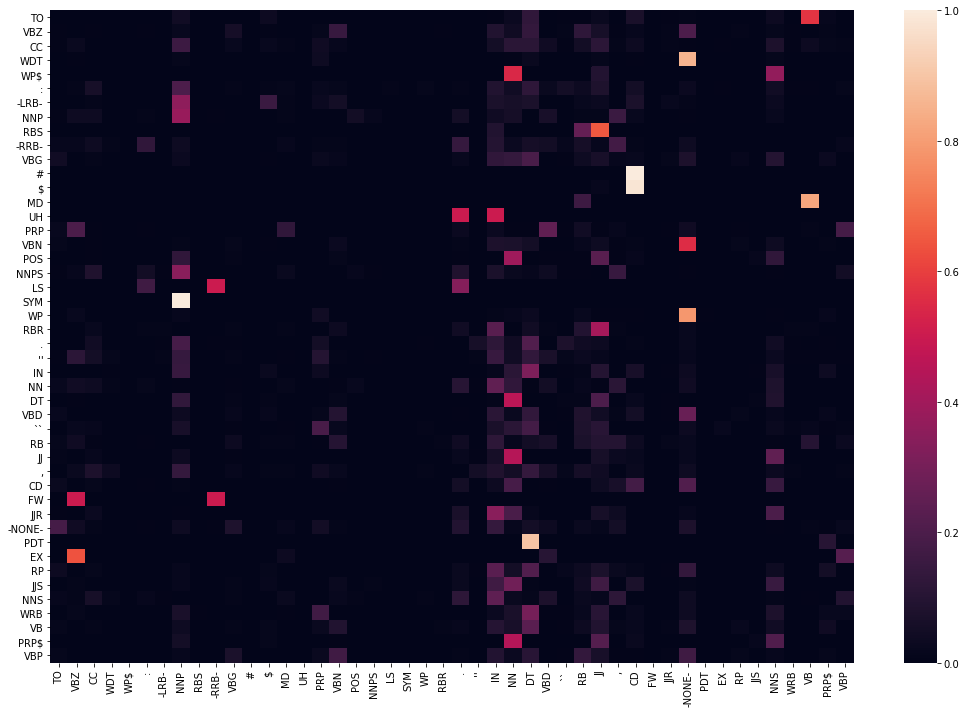

In [89]:
# heatmap of tags matrix
# T(i, j) means P(tag j given tag i)
plt.figure(figsize=(18, 12))
sns.heatmap(tags_df)
plt.show()

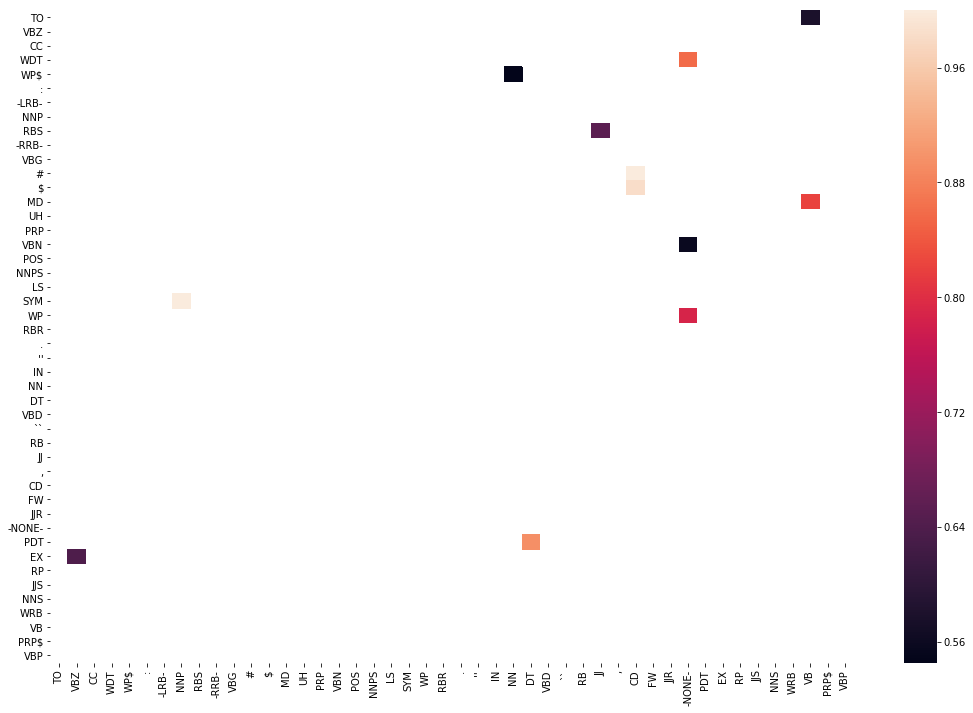

In [90]:
# frequent tags
# filter the df to get P(t2, t1) > 0.5
tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(18, 12))
sns.heatmap(tags_frequent)
plt.show()

## VITERBI ALGORITHM



In [91]:
len(train_tagged_words)

70626

In [92]:
# Viterbi Heuristic
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))


## 4. Evaluating on Test Set

In [93]:
# Running on entire test dataset would take more than 3-4hrs. 
# Let's test our Viterbi algorithm on a few sample sentences of test dataset

random.seed(1234)

# choose random 5 sents
rndom = [random.randint(1,len(test_set)) for x in range(5)]

# list of sents
test_run = [test_set[i] for i in rndom]

# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]

# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]
test_run

[[('Markets', 'NNS'), ('--', ':')],
 [('In', 'IN'),
  ('October', 'NNP'),
  ('1989', 'CD'),
  (',', ','),
  ('16.9', 'CD'),
  ('%', 'NN'),
  ('said', 'VBD'),
  ('0', '-NONE-'),
  ('more', 'JJR'),
  ('jobs', 'NNS'),
  ('will', 'MD'),
  ('be', 'VB'),
  ('created', 'VBN'),
  ('*-1', '-NONE-'),
  ('in', 'IN'),
  ('the', 'DT'),
  ('coming', 'VBG'),
  ('six', 'CD'),
  ('months', 'NNS'),
  (',', ','),
  ('compared', 'VBN'),
  ('with', 'IN'),
  ('17.4', 'CD'),
  ('%', 'NN'),
  ('in', 'IN'),
  ('September', 'NNP'),
  ('and', 'CC'),
  ('18.6', 'CD'),
  ('%', 'NN'),
  ('in', 'IN'),
  ('October', 'NNP'),
  ('1988', 'CD'),
  ('.', '.')],
 [('The', 'DT'),
  ('ultimate', 'JJ'),
  ('goal', 'NN'),
  ('of', 'IN'),
  ('any', 'DT'),
  ('investor', 'NN'),
  ('is', 'VBZ'),
  ('a', 'DT'),
  ('profit', 'NN'),
  ('motive', 'NN'),
  (',', ','),
  ('and', 'CC'),
  ('regulators', 'NNS'),
  ('should', 'MD'),
  ('not', 'RB'),
  ('concern', 'VB'),
  ('themselves', 'PRP'),
  ('with', 'IN'),
  ('whether', 'IN'),
  ('i

In [94]:
# tagging the test sentences
start = time.time()
tagged_seq = Viterbi(test_tagged_words)
end = time.time()
difference = end-start

In [95]:
print("Time taken in seconds: ", difference)
print(tagged_seq)
#print(test_run_base)

Time taken in seconds:  46.95950222015381
[('Markets', 'NNPS'), ('--', ':'), ('In', 'IN'), ('October', 'NNP'), ('1989', 'CD'), (',', ','), ('16.9', 'TO'), ('%', 'NN'), ('said', 'VBD'), ('0', '-NONE-'), ('more', 'RBR'), ('jobs', 'TO'), ('will', 'NN'), ('be', 'VB'), ('created', 'VBN'), ('*-1', '-NONE-'), ('in', 'IN'), ('the', 'DT'), ('coming', 'VBG'), ('six', 'CD'), ('months', 'NNS'), (',', ','), ('compared', 'VBN'), ('with', 'IN'), ('17.4', 'TO'), ('%', 'NN'), ('in', 'IN'), ('September', 'NNP'), ('and', 'CC'), ('18.6', 'TO'), ('%', 'NN'), ('in', 'IN'), ('October', 'NNP'), ('1988', 'CD'), ('.', '.'), ('The', 'DT'), ('ultimate', 'JJ'), ('goal', 'TO'), ('of', 'IN'), ('any', 'DT'), ('investor', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('profit', 'NN'), ('motive', 'NN'), (',', ','), ('and', 'CC'), ('regulators', 'NNS'), ('should', 'MD'), ('not', 'RB'), ('concern', 'NN'), ('themselves', 'PRP'), ('with', 'IN'), ('whether', 'IN'), ('investors', 'NNS'), ('are', 'VBP'), ('sufficiently', 'TO'), ('focuse

In [96]:
# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 

In [97]:
accuracy = len(check)/len(tagged_seq)

In [98]:
accuracy

0.8222222222222222

In [99]:
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0]!=j[1]]

In [100]:
incorrect_tagged_cases

[[('.', '.'), (('Markets', 'NNPS'), ('Markets', 'NNS'))],
 [(',', ','), (('16.9', 'TO'), ('16.9', 'CD'))],
 [('0', '-NONE-'), (('more', 'RBR'), ('more', 'JJR'))],
 [('more', 'JJR'), (('jobs', 'TO'), ('jobs', 'NNS'))],
 [('jobs', 'NNS'), (('will', 'NN'), ('will', 'MD'))],
 [('with', 'IN'), (('17.4', 'TO'), ('17.4', 'CD'))],
 [('and', 'CC'), (('18.6', 'TO'), ('18.6', 'CD'))],
 [('ultimate', 'JJ'), (('goal', 'TO'), ('goal', 'NN'))],
 [('not', 'RB'), (('concern', 'NN'), ('concern', 'VB'))],
 [('are', 'VBP'), (('sufficiently', 'TO'), ('sufficiently', 'RB'))],
 [('.', '.'), (('Americans', 'NNPS'), ('Americans', 'NNS'))],
 [('today', 'NN'), (('spend', 'TO'), ('spend', 'VBP'))],
 [('like', 'IN'), (('pocket', 'TO'), ('pocket', 'NN'))],
 [('pocket', 'NN'), (('change', 'VB'), ('change', 'NN'))],
 [("n't", 'RB'), (('think', 'VBP'), ('think', 'VB'))],
 [('think', 'VB'), (('much', 'RB'), ('much', 'JJ'))]]

In [101]:
## Testing
sentence_test = 'Twitter is the best networking social site. Man is a social animal. Data science is an emerging field. Data science jobs are high in demand.'
words = word_tokenize(sentence_test)

start = time.time()
tagged_seq = Viterbi(words)
end = time.time()
difference = end-start

In [102]:
print(tagged_seq)
print(difference)

[('Twitter', 'TO'), ('is', 'TO'), ('the', 'DT'), ('best', 'JJS'), ('networking', 'NN'), ('social', 'JJ'), ('site', 'TO'), ('.', 'TO'), ('Man', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('social', 'JJ'), ('animal', 'TO'), ('.', 'TO'), ('Data', 'NNP'), ('science', 'NN'), ('is', 'VBZ'), ('an', 'DT'), ('emerging', 'VBG'), ('field', 'NN'), ('.', '.'), ('Data', 'NNP'), ('science', 'NN'), ('jobs', 'NNS'), ('are', 'VBP'), ('high', 'JJ'), ('in', 'IN'), ('demand', 'NN'), ('.', '.')]
15.136372089385986


In [104]:
print(t2_given_t1('VB', 'MD'))

(546, 665)


In [105]:
546/665

0.8210526315789474